<a href="https://colab.research.google.com/github/Nitish-McQueen/Spectrum-Internship/blob/master/FinalTask_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving student-math.csv to student-math.csv


In [0]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('student-math.csv', sep = ';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
#Converting all object data type into numeric values using LabelEncoder
from sklearn.preprocessing import LabelEncoder
a_school=LabelEncoder()
a_address=LabelEncoder()
a_famsize=LabelEncoder()
a_sex=LabelEncoder()
a_Pstatus=LabelEncoder()
a_Mjob=LabelEncoder()
a_Fjob=LabelEncoder()
a_reason=LabelEncoder()
a_guardian=LabelEncoder()
a_scoolsup=LabelEncoder()
a_famsup=LabelEncoder()
a_paid=LabelEncoder()
a_activities=LabelEncoder()
a_nursery=LabelEncoder()
a_higher=LabelEncoder()
a_internet=LabelEncoder()
a_romantic=LabelEncoder()

df["school"]=a_school.fit_transform(df["school"])
df["sex"]=a_sex.fit_transform(df["sex"])
df["address"]=a_address.fit_transform(df["address"])
df["famsize"]=a_famsize.fit_transform(df["famsize"])
df["Pstatus"]=a_Pstatus.fit_transform(df["Pstatus"])
df["Mjob"]=a_Mjob.fit_transform(df["Mjob"])
df["Fjob"]=a_Fjob.fit_transform(df["Fjob"])
df["reason"]=a_reason.fit_transform(df["reason"])
df["guardian"]=a_guardian.fit_transform(df["guardian"])
df["schoolsup"]=a_scoolsup.fit_transform(df["schoolsup"])
df["famsup"]=a_famsup.fit_transform(df["famsup"])
df["paid"]=a_paid.fit_transform(df["paid"])
df["activities"]=a_activities.fit_transform(df["activities"])
df["nursery"]=a_nursery.fit_transform(df["nursery"])
df["higher"]=a_higher.fit_transform(df["higher"])
df["internet"]=a_internet.fit_transform(df["internet"])
df["romantic"]=a_romantic.fit_transform(df["romantic"])
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [0]:
#Creating a "final_grade" Column
df["final_grade"]=df['G1'] + df['G2'] + df['G3']

In [0]:
#	Initialize a variable x which shall contain every other column except “G3”.
x=df.iloc[:,:-2]
#	Initialize a variable y which shall contain the output column, i.e., final_grade
y=df.iloc[:,-1]

In [0]:
#Splitting the dataset into Training and Testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [0]:
#Creating a Linear Regression model
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()

In [9]:
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [10]:
#Predicting the result
predict= np.int64(model.predict(X_test))
print(predict)

[42 33 29 46 46 39 38 33 27 46 24 33 32 25 45 41 37 28 29 44 23 11 23 41
 38 46 27 54 12 36  4 24 29 19 41 34 37 51 19 36 17 58 24 23 30  4 32 12
 38 17 30 50 33 16 35 25 29 39 41 40 38 41 42 46 18 45 54 41 17 28 27 40
 22 11 26 24 31 50 15]


In [11]:
#Checking the Accuracy score  
print("Training dataset Score :",model.score(X_train,y_train))
print("Testing dataset Score :",model.score(X_test,y_test))
print("Actual data VS predicted data Score :",model.score(X_test,predict))

Training dataset Score : 1.0
Testing dataset Score : 0.9492372418936542
Actual data VS predicted data Score : 1.0


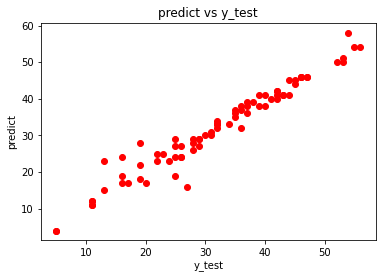

In [12]:
#scatter plot between the true and predicted values 
plt.scatter(y_test,predict,color='red')
plt.title('predict vs y_test')
plt.xlabel('y_test')
plt.ylabel('predict')
plt.show()